In [1]:
from pathlib import Path

In [149]:
peaks_root = Path("/mnt/stripe/bio/experiments/configs/benchmark/benchmark")
tool= "zinbra"
# tool = "macs_broad"
data_config="/mnt/stripe/bio/experiments/aging/peaks_len/Y5O5.yaml"
output_dir = "/mnt/stripe/bio/experiments/aging/peaks_len"

In [150]:
mods = ["k27me3", "k27ac", "k4me3", "k4me1", "k36me3"]

# Get best 5 vs 5 peak files from *.yaml

In [152]:
mods_to_best_donors = {}
for m in mods:
    print("Processing", m)
    names = !cat {data_config} | grep {m} | grep path | cut -d ':' -f 2 | xargs basename | sed "s/.bam//g"
    mods_to_best_donors[m] = [s.split("_")[0] for s in names]
    
for m, donors in mods_to_best_donors.items():
    print(m, donors)

Processing k27me3
Processing k27ac
Processing k4me3
Processing k4me1
Processing k36me3
k27me3 ['OD1', 'OD2', 'OD3', 'OD14', 'OD15', 'YD5', 'YD7', 'YD8', 'YD19', 'YD21']
k27ac ['OD3', 'OD4', 'OD7', 'OD10', 'OD13', 'YD7', 'YD8', 'YD9', 'YD21', 'YD19']
k4me3 ['OD3', 'OD8', 'OD9', 'OD13', 'OD20', 'YD6', 'YD9', 'YD16', 'YD19', 'YD20']
k4me1 ['OD10', 'OD13', 'OD14', 'OD15', 'OD20', 'YD6', 'YD8', 'YD17', 'YD19', 'YD20']
k36me3 ['OD11', 'OD13', 'OD14', 'OD16', 'OD19', 'YD6', 'YD8', 'YD14', 'YD15', 'YD19']


In [138]:
mods_to_best_donor_files = {}
for m, ids in mods_to_best_donors.items():
    files = []
    for id in ids:
        #res = ! find {peaks_root} -maxdepth 3 \( -wholename "*/bed/{id}*Peak" -or -wholename "*/bed/{id}*.bed" \)
        res = ! find {peaks_root} -maxdepth 3 \( -ipath "*{m}/{tool}/*{id}_*peaks.bed" -or -ipath "*{m}/{tool}/*{id}_*Peak" \)
        assert 1 == len(res)
        files.extend(res)
        if not res:
            print("Missed: ", m, id)
    mods_to_best_donor_files[m] = files
    
mods_to_best_donor_files

{'k27ac': ['/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/OD3_1.0E-12_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/OD4_1.0E-10_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/OD7_1.0E-12_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/OD10_1.0E-10_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/OD13_1.0E-12_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/YD7_1.0E-12_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/YD8_1.0E-12_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/YD9_1.0E-12_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/YD21_1.0E-10_5_peaks.bed',
  '/mnt/stripe/bio/experiments/configs/benchmark/benchmark/H3K27ac/zinbra/YD19_1.0E-12_5

## Build peaks length distribution

In [139]:
output_dir

'/mnt/stripe/bio/experiments/aging/peaks_len'

In [140]:
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[ k27me3 ]
  OD1_1.0E-8_40_peaks.bed: 200..647600 5% [200.0] 50% [2800.0] 95% [22569.99999999989]
  OD2_1.0E-8_40_peaks.bed: 200..507000 5% [200.0] 50% [2800.0] 95% [23400.0]
  OD3_1.0E-10_40_peaks.bed: 200..163600 5% [200.0] 50% [2600.0] 95% [17000.0]
  OD14_1.0E-8_40_peaks.bed: 200..317600 5% [200.0] 50% [2800.0] 95% [23400.0]
  OD15_1.0E-8_40_peaks.bed: 200..419600 5% [200.0] 50% [2800.0] 95% [23100.0]
  YD5_1.0E-8_40_peaks.bed: 200..574000 5% [200.0] 50% [2800.0] 95% [22929.999999999927]
  YD7_1.0E-10_40_peaks.bed: 200..161600 5% [200.0] 50% [2600.0] 95% [17000.0]
  YD8_1.0E-8_40_peaks.bed: 200..633200 5% [200.0] 50% [2800.0] 95% [21200.0]
  YD19_1.0E-6_40_peaks.bed: 200..1117400 5% [200.0] 50% [3000.0] 95% [23819.99999999989]
  YD21_1.0E-10_40_peaks.bed: 200..162600 5% [200.0] 50% [2400.0] 95% [16200.0]


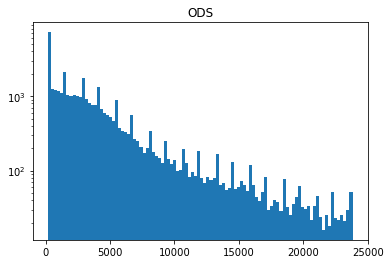

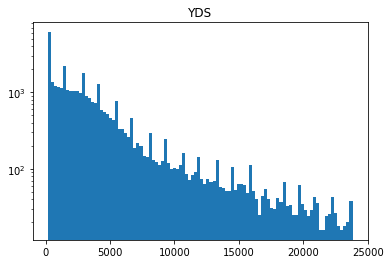

[ k27ac ]
  OD3_1.0E-12_5_peaks.bed: 200..23000 5% [200.0] 50% [1000.0] 95% [4000.0]
  OD4_1.0E-10_5_peaks.bed: 200..22000 5% [200.0] 50% [1000.0] 95% [3800.0]
  OD7_1.0E-12_5_peaks.bed: 200..21200 5% [200.0] 50% [1000.0] 95% [3600.0]
  OD10_1.0E-10_5_peaks.bed: 200..22600 5% [200.0] 50% [800.0] 95% [3600.0]
  OD13_1.0E-12_5_peaks.bed: 200..19200 5% [200.0] 50% [800.0] 95% [3200.0]
  YD7_1.0E-12_5_peaks.bed: 200..22800 5% [200.0] 50% [1000.0] 95% [3600.0]
  YD8_1.0E-12_5_peaks.bed: 200..22800 5% [200.0] 50% [1000.0] 95% [3800.0]
  YD9_1.0E-12_5_peaks.bed: 200..29000 5% [200.0] 50% [1000.0] 95% [3600.0]
  YD21_1.0E-10_5_peaks.bed: 200..23200 5% [200.0] 50% [1000.0] 95% [3600.0]
  YD19_1.0E-12_5_peaks.bed: 200..22800 5% [200.0] 50% [1000.0] 95% [3600.0]


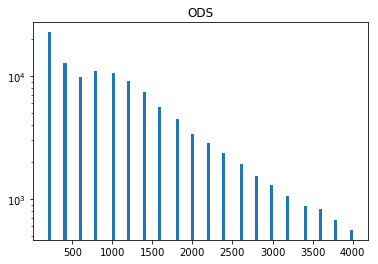

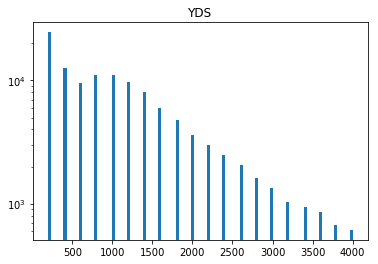

[ k4me3 ]
  OD3_1.0E-6_10_peaks.bed: 200..146400 5% [200.0] 50% [1200.0] 95% [6000.0]
  OD8_1.0E-4_10_peaks.bed: 200..1451400 5% [200.0] 50% [1000.0] 95% [3400.0]
  OD9_1.0E-4_10_peaks.bed: 200..54200 5% [400.0] 50% [1200.0] 95% [3800.0]
  OD13_0.01_5_peaks.bed: 200..3233200 5% [400.0] 50% [1400.0] 95% [3800.0]
  OD20_1.0E-8_10_peaks.bed: 200..22000 5% [200.0] 50% [800.0] 95% [3600.0]
  YD6_1.0E-8_10_peaks.bed: 200..18400 5% [200.0] 50% [1000.0] 95% [3200.0]
  YD9_1.0E-4_10_peaks.bed: 200..51200 5% [200.0] 50% [1200.0] 95% [4000.0]
  YD16_1.0E-4_10_peaks.bed: 200..1814200 5% [400.0] 50% [1200.0] 95% [5200.0]
  YD19_1.0E-4_10_peaks.bed: 200..1417200 5% [400.0] 50% [1200.0] 95% [4800.0]
  YD20_0.01_5_peaks.bed: 200..2341400 5% [200.0] 50% [600.0] 95% [3200.0]


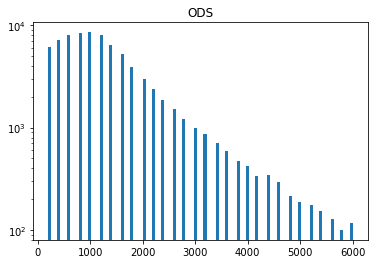

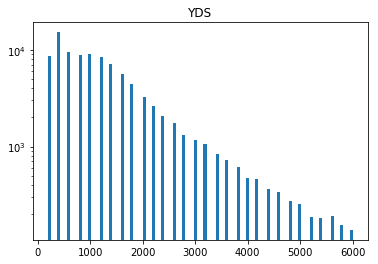

[ k4me1 ]
  OD10_1.0E-8_10_peaks.bed: 200..152600 5% [200.0] 50% [1400.0] 95% [9400.0]
  OD13_1.0E-10_10_peaks.bed: 200..78600 5% [200.0] 50% [1200.0] 95% [8000.0]
  OD14_1.0E-10_10_peaks.bed: 200..78800 5% [200.0] 50% [1200.0] 95% [7600.0]
  OD15_1.0E-10_10_peaks.bed: 200..71800 5% [200.0] 50% [1200.0] 95% [8000.0]
  OD20_1.0E-10_10_peaks.bed: 200..71800 5% [200.0] 50% [1000.0] 95% [7200.0]
  YD6_1.0E-8_10_peaks.bed: 200..98400 5% [200.0] 50% [1200.0] 95% [8000.0]
  YD8_1.0E-8_10_peaks.bed: 200..153400 5% [200.0] 50% [1200.0] 95% [7800.0]
  YD17_1.0E-8_10_peaks.bed: 200..123400 5% [200.0] 50% [1200.0] 95% [7800.0]
  YD19_1.0E-8_10_peaks.bed: 200..87200 5% [200.0] 50% [1200.0] 95% [7800.0]
  YD20_1.0E-10_10_peaks.bed: 200..78400 5% [200.0] 50% [1000.0] 95% [7400.0]


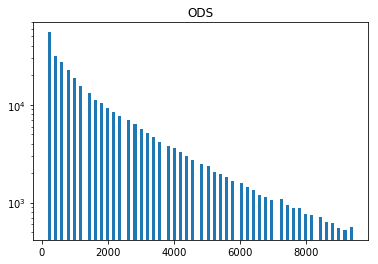

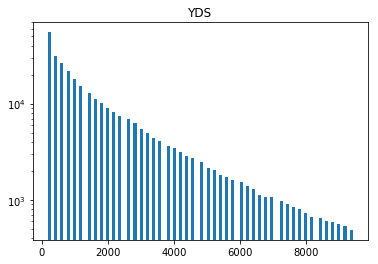

[ k36me3 ]
  OD11_1.0E-6_40_peaks.bed: 200..448000 5% [200.0] 50% [10800.0] 95% [84909.99999999985]
  OD13_1.0E-10_40_peaks.bed: 200..275400 5% [200.0] 50% [9000.0] 95% [67800.0]
  OD14_1.0E-8_40_peaks.bed: 200..379200 5% [200.0] 50% [9200.0] 95% [73600.0]
  OD16_1.0E-6_40_peaks.bed: 200..448800 5% [200.0] 50% [11600.0] 95% [86150.0]
  OD19_1.0E-6_40_peaks.bed: 200..296800 5% [200.0] 50% [11200.0] 95% [83200.0]
  YD6_1.0E-8_40_peaks.bed: 200..388000 5% [200.0] 50% [8800.0] 95% [74400.0]
  YD8_1.0E-6_40_peaks.bed: 200..449000 5% [200.0] 50% [11000.0] 95% [84879.99999999993]
  YD14_1.0E-8_40_peaks.bed: 200..308200 5% [200.0] 50% [9600.0] 95% [73800.0]
  YD15_1.0E-8_40_peaks.bed: 200..437000 5% [200.0] 50% [9000.0] 95% [70319.99999999971]
  YD19_1.0E-6_40_peaks.bed: 200..761200 5% [200.0] 50% [12400.0] 95% [92400.0]


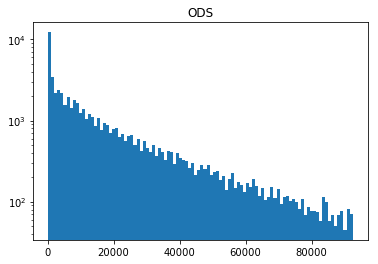

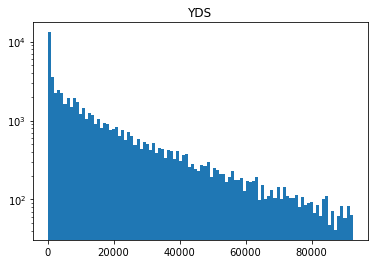

In [141]:

for m, files in mods_to_best_donor_files.items():
    print("[", m, "]")
    
    columns = {}
    lmin = None
    lmax = None
    for f in files:
        #print("File: ", f)
        fname = os.path.basename(f)
        #! mkdir -p {output_dir}/peak_lengths/{m}
        # ! cat {f} | awk '{{ print $$3 - $$2}}' | sort -g | uniq -c > {output_dir}/peak_lengths/{m}/{fname}.len.txt
        peak_lengths = ! cat {f} | awk '{{ print $$3 - $$2}}'
        arr = np.array([int(l) for l in peak_lengths])
        columns[fname] = arr
        p5 = np.percentile(arr, 5)
        p95 = np.percentile(arr, 95)
        lmin = p5 if lmin is None else min(lmin, p5)
        lmax = p95 if lmax is None else max(lmax, p95)
        print("  {}: {}..{} 5% [{}] 50% [{}] 95% [{}]".format(
            fname, np.min(arr), np.max(arr), p5, np.median(arr), p95))
    
#     for donor, arr in columns.items():
#         #plt.boxplot(arr)
#         plt.hist(arr, range=(lmin, lmax), bins=100)
#         plt.yscale("log")
#         plt.title(donor)
#         plt.show()
    ods = [d for d in columns if "OD" in d]
    yds = [d for d in columns if "YD" in d]
    ods_arr = np.concatenate([columns[d] for d in ods])
    yds_arr = np.concatenate([columns[d] for d in yds])
    
    plt.hist(ods_arr, range=(lmin, lmax), bins=100)
    plt.yscale("log")
    plt.title("ODS")
    plt.show()

    plt.hist(yds_arr, range=(lmin, lmax), bins=100)
    plt.yscale("log")
    plt.title("YDS")
    plt.show()



#! ls -lah {output_dir}/peak_lengths/k27me3

# Сonsensus peaks

In [146]:
def process_consensus(tool):
    if tool == "macs_broad":
        peter_tool = "macs2"
    elif tool == "zinbra":
        peter_tool = tool
    else:
        assert False, "Expected macs_broad or zinbra"
    
    for m in mods:
        ods = ! find "/mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus" -iname "*{m}*_{peter_tool}_ODS_consensus.bed"
        yds = ! find "/mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus" -iname "*{m}*_{peter_tool}_YDS_consensus.bed"
        print("ODS:", *ods)
        print("YDS:", *yds)
        lmin = None
        lmax = None
        cons_arrays = []
        for cons in [ods, yds]:
            assert len(cons) == 1
            track = cons[0]
            fname = os.path.basename(track)

            peak_lengths = ! cat {track} | awk '{{ print $$3 - $$2}}'
            arr = np.array([int(l) for l in peak_lengths])

            p5 = np.percentile(arr, 5)
            p95 = np.percentile(arr, 95)
            lmin = p5 if lmin is None else min(lmin, p5)
            lmax = p95 if lmax is None else max(lmax, p95)
            print("  {}: {}..{} 5% [{}] 50% [{}] 95% [{}]".format(
                fname,
                np.min(arr), np.max(arr), p5, np.median(arr), p95))
            cons_arrays.append(arr)
            
        for arr in cons_arrays:
            #plt.boxplot(arr)
            plt.hist(arr, range=(lmin, lmax), bins=100)
            plt.yscale("log")
            plt.title(fname)
            plt.show()

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27me3_macs2_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27me3_macs2_YDS_consensus.bed
  H3K27me3_macs2_ODS_consensus.bed: 1..61445 5% [31.0] 50% [1097.0] 95% [5970.7499999999945]
  H3K27me3_macs2_YDS_consensus.bed: 1..22720 5% [45.0] 50% [696.0] 95% [3904.7000000000007]


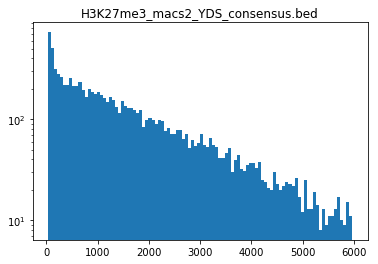

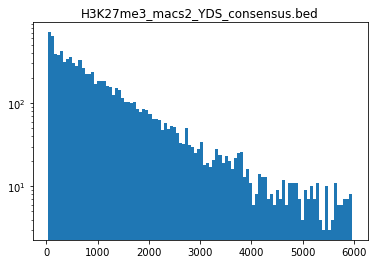

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27ac_macs2_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27ac_macs2_YDS_consensus.bed
  H3K27ac_macs2_ODS_consensus.bed: 1..18172 5% [131.0] 50% [941.0] 95% [3245.7999999999956]
  H3K27ac_macs2_YDS_consensus.bed: 1..18237 5% [113.0] 50% [923.0] 95% [3198.0]


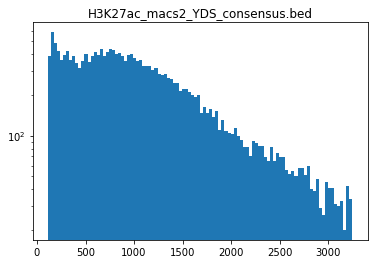

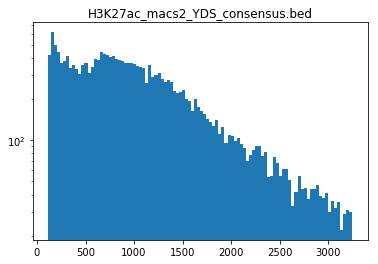

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me3_macs2_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me3_macs2_YDS_consensus.bed
  H3K4me3_macs2_ODS_consensus.bed: 1..9054 5% [127.0] 50% [786.0] 95% [2167.0]
  H3K4me3_macs2_YDS_consensus.bed: 1..8193 5% [134.0] 50% [744.0] 95% [2048.0999999999985]


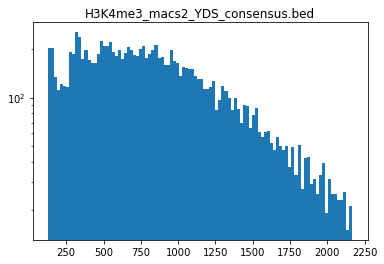

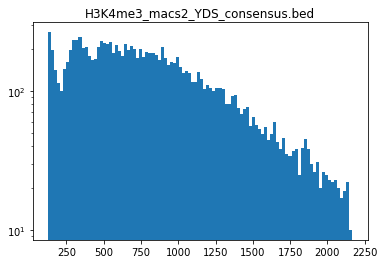

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me1_macs2_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me1_macs2_YDS_consensus.bed
  H3K4me1_macs2_ODS_consensus.bed: 1..50964 5% [112.0] 50% [828.0] 95% [4255.800000000003]
  H3K4me1_macs2_YDS_consensus.bed: 1..50864 5% [104.0] 50% [800.0] 95% [4091.399999999994]


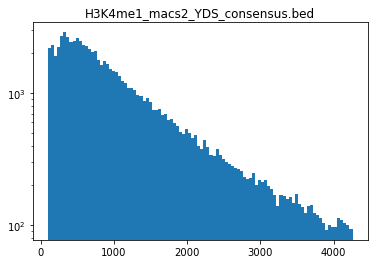

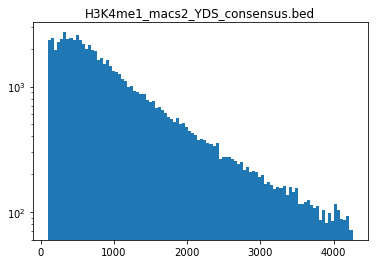

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K36me3_macs2_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K36me3_macs2_YDS_consensus.bed
  H3K36me3_macs2_ODS_consensus.bed: 1..61774 5% [41.0] 50% [781.0] 95% [5983.699999999997]
  H3K36me3_macs2_YDS_consensus.bed: 1..63271 5% [52.0] 50% [809.0] 95% [5952.0]


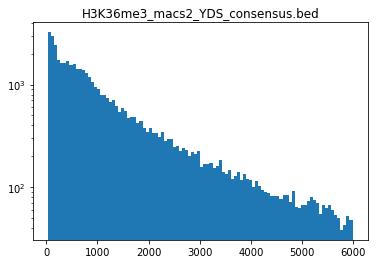

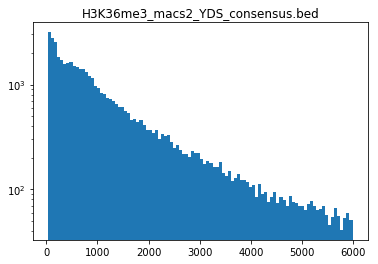

In [147]:
process_consensus("macs_broad")

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27me3_zinbra_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27me3_zinbra_YDS_consensus.bed
  H3K27me3_zinbra_ODS_consensus.bed: 200..2294600 5% [200.0] 50% [3200.0] 95% [22800.0]
  H3K27me3_zinbra_YDS_consensus.bed: 200..2295800 5% [200.0] 50% [3000.0] 95% [20769.99999999989]


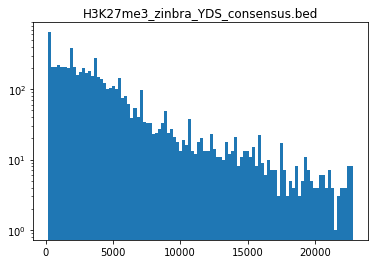

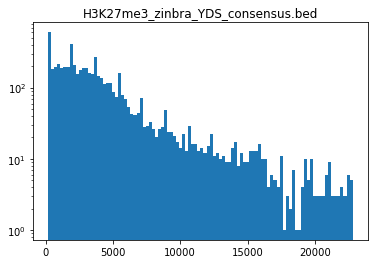

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27ac_zinbra_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K27ac_zinbra_YDS_consensus.bed
  H3K27ac_zinbra_ODS_consensus.bed: 200..22800 5% [200.0] 50% [1000.0] 95% [4000.0]
  H3K27ac_zinbra_YDS_consensus.bed: 200..22400 5% [200.0] 50% [1000.0] 95% [3800.0]


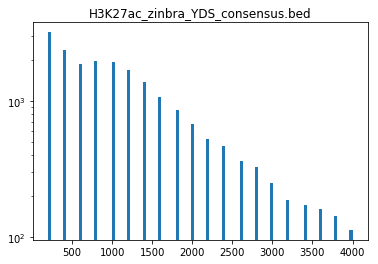

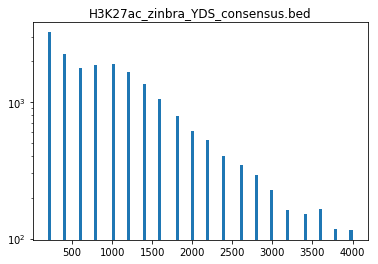

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me3_zinbra_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me3_zinbra_YDS_consensus.bed
  H3K4me3_zinbra_ODS_consensus.bed: 200..3457400 5% [200.0] 50% [1200.0] 95% [3600.0]
  H3K4me3_zinbra_YDS_consensus.bed: 200..2297600 5% [200.0] 50% [1200.0] 95% [4000.0]


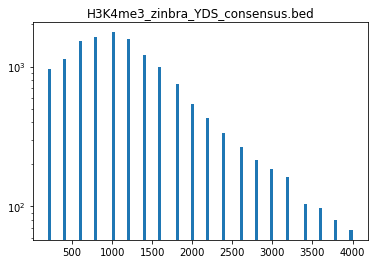

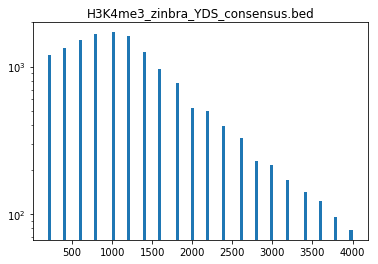

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me1_zinbra_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K4me1_zinbra_YDS_consensus.bed
  H3K4me1_zinbra_ODS_consensus.bed: 200..337800 5% [200.0] 50% [1200.0] 95% [8800.0]
  H3K4me1_zinbra_YDS_consensus.bed: 200..477800 5% [200.0] 50% [1400.0] 95% [8800.0]


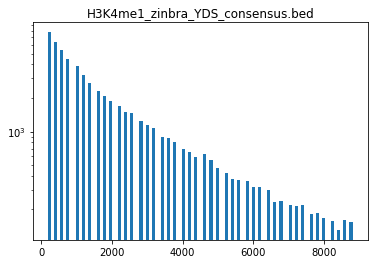

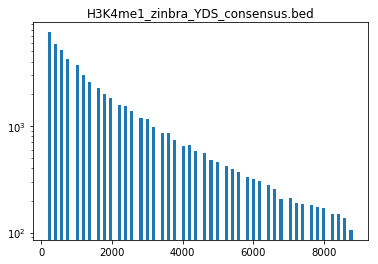

ODS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K36me3_zinbra_ODS_consensus.bed
YDS: /mnt/stripe/bio/raw-data/aging/loci_of_interest/median_consensus/H3K36me3_zinbra_YDS_consensus.bed
  H3K36me3_zinbra_ODS_consensus.bed: 200..595400 5% [200.0] 50% [10000.0] 95% [80600.0]
  H3K36me3_zinbra_YDS_consensus.bed: 200..843400 5% [200.0] 50% [10400.0] 95% [82000.0]


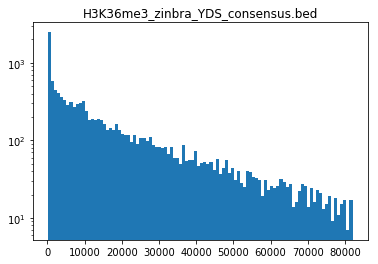

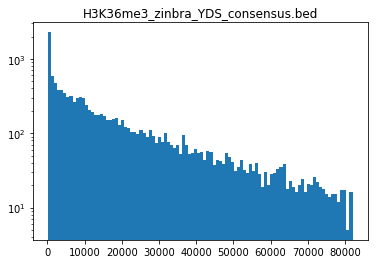

In [148]:
process_consensus("zinbra")

* boxplots for distr
* ? median consensus
* table donors x donors

The only diff is **macs_broad@k27me3** which isn't too important, because we consider k27me3 to be wide peaks and macs2 broad isn't best choice for it